In [1]:
import time
notebook_start = time.time()
%matplotlib nbagg
import matplotlib
import matplotlib.pylab as plt
# import main module
import tiox_jf_utils as tiox

## Read Scan Info ##

In [2]:
scan_info = tiox.readJson(161)
print( scan_info.keys() )

['scan_values_all', 'scan_values', 'scan_files', 'scan_readbacks', 'scan_parameters', 'scan_step_info']


## do Azimuthal averaging (note: can take very long time!)

In [3]:
#data = tiox.anaScan(161,force=True,peakThreshold=1)

### Test of wavelength/distance correction

In [4]:
res = [tiox.anaScan(161,refine_pars=i,plot='none') for i in range(4)]

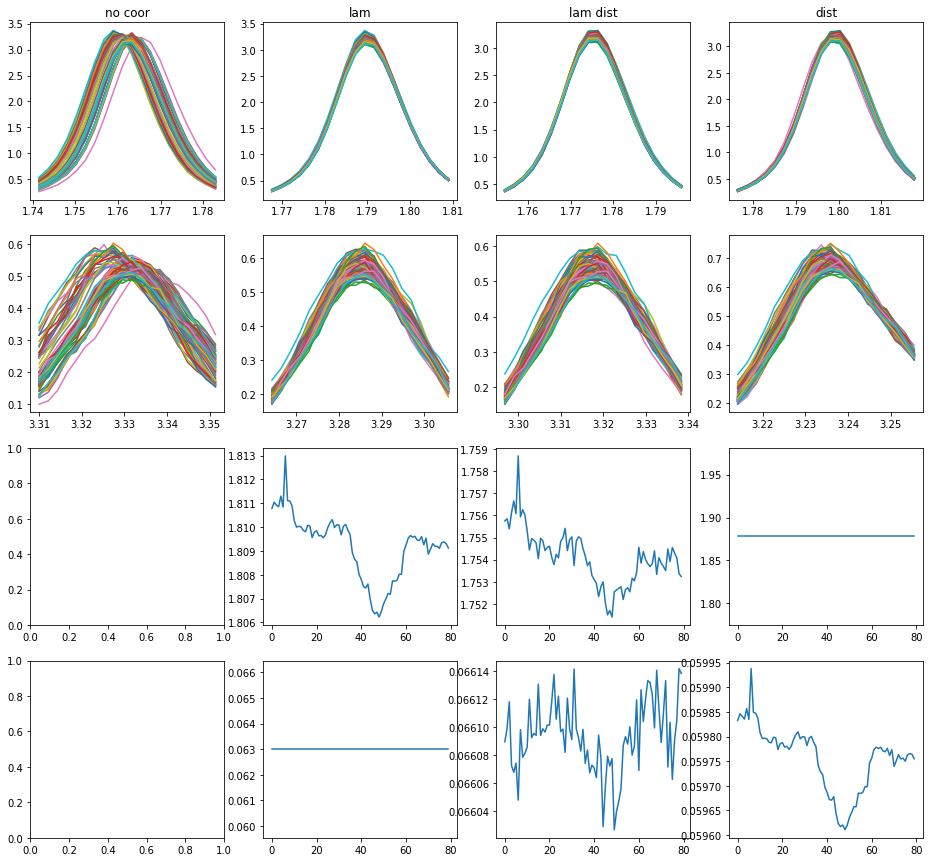

In [5]:
fig,axes=plt.subplots(4,4,figsize=[16,15])
comments = ['no coor','lam','lam dist','dist']
for comment,r,ax in zip(comments,res,axes.T):
    idx = np.argmax(np.median(r.nobkg.offs,axis=0))
    idx = slice(idx-10,idx+10)
    ax[0].plot(r.nobkg.q[idx],r.nobkg.offs[:80,idx].T)
    ax[0].set_title(comment)
    
    idx = np.argmax(np.median(r.nobkg.offs,axis=0)[r.nobkg.q>3.2])
    m = tiox.trx.utils.findSlice(r.nobkg.q,(3.2,4))
    idx = idx+ m.start
    idx = slice(idx-10,idx+10)
    ax[1].plot(r.nobkg.q[idx],r.nobkg.offs[:80,idx].T)

    if r.corrections is not None:
        ax[2].plot(r.corrections.lam[:80])
        ax[3].plot(r.corrections.dist[:80])
    
#axes[0].set_xlim(1.7,1.85)

# results as function of time delays

In [ ]:
# the automatic plot is not great, isn't ...
# will use pre-saved azav files
data = tiox.anaScan(161)
data.ons.shape

In [7]:
help(tiox.anaScan)

Help on function anaScan in module tiox_jf_utils:

anaScan(scan_no, scan_folder='../../scan_data', doAzAv=False, force=False, peakThreshold=1, norm=(0.7, 0.9), refine_pars=2, exclude=None, toffset=3.75e-11, save=True, plot=['diffs', 'ons'], clim='auto', plotScan=False)
    this is to analyze scans taken with eco
    
    Parameters
    ----------
    
    scan_no: int or tuple
        scan(s) to analyze
    
    scan_folder: string
        where data are to be found (if None use full path in json file
    
    doAzAv: bool
        if azav should be started, ususlaly false because AzAv taken care
        by other process (autoAnalysisScanFolder)
    
    force: bool
        Force calculation of azimuthal averages even if presence (internally
        also changes doAzAv to True)
    
    peakThreshold: float
        used to remove intense peaks from big crystallites.
        units are in azimuathally averaged values (of 100 images image), 
        i.e. 1 means that it removes pixels that

In [8]:
data = tiox.anaScan(161,plot='none')

In [9]:
# create small utility function ...
def getDelay(delay,what='diffs',withBkg=True,verbose=False):
    idx = np.argmin(np.abs(delay-data.delays))
    
    if verbose: print('getting delay %s'%delay,idx)
    
    getfrom = data.nobkg if withBkg else data
        
    return getfrom.q,getfrom[what][idx]

In [10]:
delays_str = [tiox.trx.utils.timeToStr(delay,fmt="%.1f") for delay in data.delays]
print(delays_str)

['-7.5ps', '-6.5ps', '-5.5ps', '-4.5ps', '-3.5ps', '-2.5ps', '-1.5ps', '-0.5fs', '0.5fs', '1.5ps', '2.5ps', '3.5ps', '4.5ps', '5.5ps', '6.5ps', '7.5ps', '8.5ps', '9.5ps', '10.5ps', '11.5ps', '12.5ps', '13.5ps', '14.5ps', '15.5ps', '16.5ps', '17.5ps', '18.5ps', '19.5ps', '20.5ps', '21.5ps', '22.5ps', '23.5ps', '24.5ps', '25.5ps', '26.5ps', '27.5ps', '28.5ps', '29.5ps', '30.5ps', '31.5ps', '32.5ps', '33.5ps', '34.5ps', '35.5ps', '36.5ps', '37.5ps', '38.5ps', '39.5ps', '40.5ps', '41.5ps', '42.5ps', '43.5ps', '44.5ps', '45.5ps', '46.5ps', '47.5ps', '48.5ps', '49.5ps', '50.5ps', '51.5ps', '52.5ps', '53.5ps', '54.5ps', '55.5ps', '56.5ps', '57.5ps', '58.5ps', '59.5ps', '60.5ps', '61.5ps', '62.5ps', '63.5ps', '64.5ps', '65.5ps', '66.5ps', '67.5ps', '68.5ps', '69.5ps', '70.5ps', '71.5ps', '72.5ps', '73.5ps', '74.5ps', '75.5ps', '76.5ps', '77.5ps', '78.5ps', '79.5ps', '80.5ps', '81.5ps', '82.5ps', '83.5ps', '84.5ps', '85.5ps', '86.5ps', '87.5ps', '1.0ns', '10.0ns', '10.0ns', '10.0ns', '10.0ns', 

### Looking at results as funciton of delays

(1, 3.5)

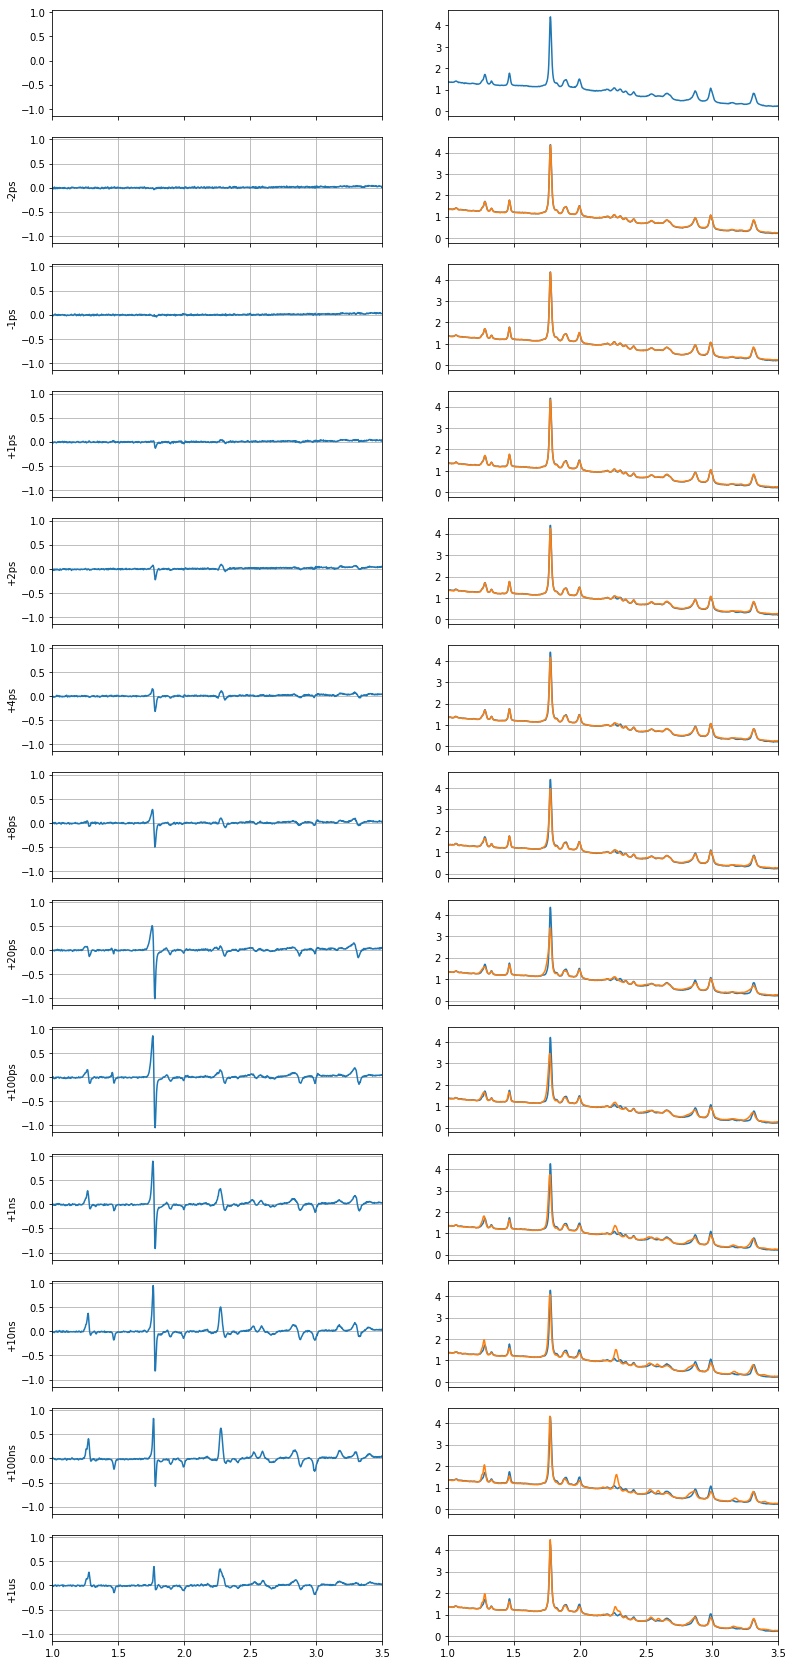

In [11]:
delays = (-2e-12,-1e-12,1e-12,2e-12,4e-12,8e-12,20e-12,100e-12,1e-9,10e-9,100e-9,1e-6)
fig,axes=plt.subplots(len(delays)+1,2,figsize=[13,30],sharex=True,sharey='col')

#axes[0,0].plot(*getDelay(0,withBkg=False,what='offs'))
axes[0,1].plot(*getDelay(0,withBkg=False,what='offs'))
for delay,ax in zip(delays,axes[1:]):
    label = tiox.trx.utils.timeToStr(delay)
    ax[0].plot(*getDelay(delay),label=label)
    ax[0].grid()
    ax[1].grid()
    ax[0].set_ylabel(label)
    ax[1].plot(*getDelay(delay,withBkg=False,what='offs'))
    ax[1].plot(*getDelay(delay,withBkg=False,what='ons'))
axes[-1,0].set_xlim(1,3.5)
#tiox.trx.cell.plotReflections(tiox.trx.cell.ti3o5_alpha,ax=axes[0])


## Show some peak integral ...

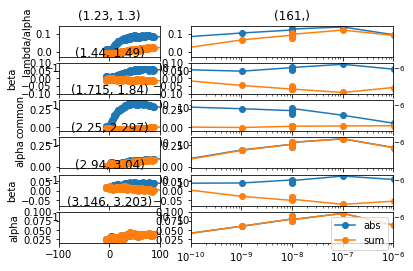

In [12]:
#automatic plot
peaks=tiox.integrate_peaks(data)

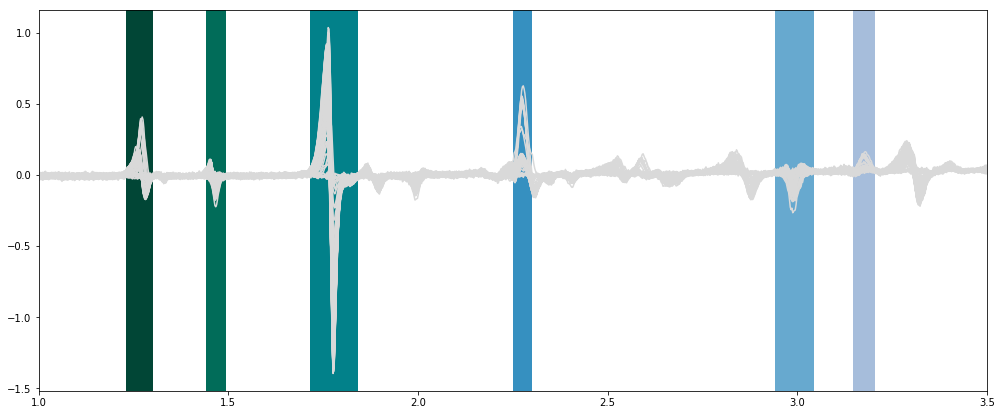

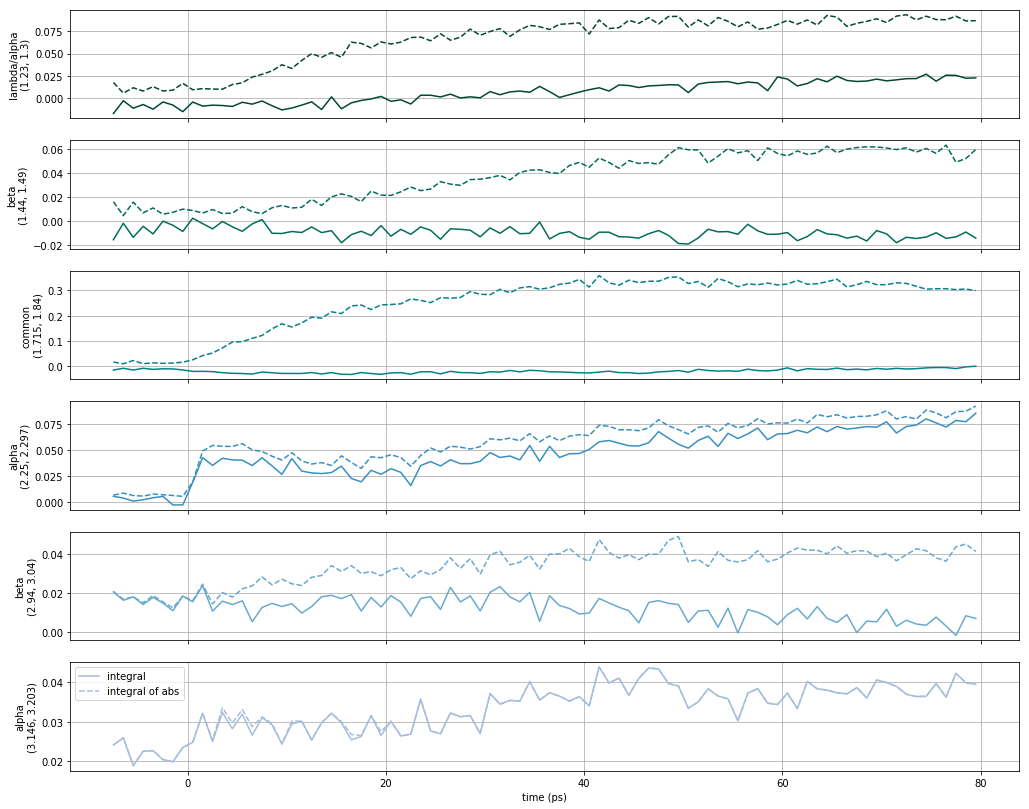

In [13]:
# fine tuned plot
peaks = tiox.integrate_peaks(data,plot=False)

colors = ['#014636', '#016c59', '#02818a', '#3690c0', '#67a9cf', '#a6bddb', '#d0d1e6', '#ece2f0']

peaks.keys()
fig,ax1 = plt.subplots(figsize=[17,7])
_ = ax1.plot(data.q,data.diffs.T,color='0.85')
for ipos,pos in enumerate(peaks.peaks_pos):
    ax1.axvspan(*pos,color=colors[ipos])
ax1.set_xlim(1,3.5)

fig,axes=plt.subplots(len(peaks.peaks_pos),1,figsize=[17,14],sharex=True)

idx = (peaks.delays*1e12) < 80
t = peaks.delays[idx]*1e12
for ax,pos,info,integral,absolute,color in zip(axes,peaks.peaks_pos,peaks.peak_info,peaks.integral,peaks.absolute,colors):
    ax.plot(t,integral[idx],color=color,label='integral')
    ax.plot(t,absolute[idx],'--',color=color,label='integral of abs')
    ax.grid()
    ax.set_ylabel( info + "\n%s" % str(pos))
axes[-1].set_xlabel("time (ps)")
axes[-1].legend()

    
#potsize = (len(peaks.peaks_pos),2)


In [14]:
print("Executing notebook took %.1f"%(time.time()-notebook_start))

Executing notebook took 66.1
